#### Import dependencies

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import os
from collections import defaultdict

In [3]:
import sys
import pathlib
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

np.set_printoptions(precision=4)
np.set_printoptions(formatter={'float': "{:0.4f}".format})

In [4]:
warnings.filterwarnings('ignore')

#### Func to load data in

In [5]:
def load_data(path):
    data = pd.read_csv(path)
    return data

##### Call load_data func

In [6]:
path1 = "IA2-train.csv"
train = load_data(path1)
path2 = "IA2-dev.csv"
dev = load_data(path2)

#### Data preprocessing function

In [7]:
def preprocess_data(train, dev):
    column = ['Age', 'Annual_Premium', 'Vintage']
    column_mean = []
    column_std = []
    
    for col in column:
        column_mean.append(train[col].mean())
        column_std.append(train[col].std())
        train[col] = (train[col] - train[col].mean()) / train[col].std()
        

    for index, col in enumerate(column):
        dev[col] = (dev[col] - column_mean[index]) / column_std[index]
        
    return train, dev

#### Other helper functions

In [8]:
def sigmoid_func(learned_hypo):
    return 1 / (1 + np.exp(-learned_hypo))

def cal_accuracy(y_pred, y_true):
    y_pred = [1 if x >= 0.5 else 0 for x in y_pred]
    return (y_pred == y_true).mean()

#### Ridge logistic regression func

In [9]:
def logistic_regression(X, y, lr, lambd, dev_X, dev_y):
    weight = np.zeros(X.shape[1])
    stopping_threshold = 1e-8
    
    for itr in range(10000):
        gradient = ((X.multiply(y - sigmoid_func(X.dot(weight)), axis=0)).mean())
        weight = weight + lr * gradient
        weight[1:] = weight[1:] - lr * lambd * weight[1:]
        
        train_acc = cal_accuracy(sigmoid_func(X.dot(weight)), y)
        dev_acc = cal_accuracy(sigmoid_func(dev_X.dot(weight)), dev_y)
        
        loss = ((-1 * y * np.log(sigmoid_func(X.dot(weight)))) - ((np.ones(X.shape[0]) - y) * np.log(
            np.ones(X.shape[0]) - sigmoid_func(X.dot(weight))))).mean() + lambd * np.sum(np.power(weight[1:], 2))
        
        # print("iter={}, loss={}, train_acc={}, dev_acc={}".format(itr + 1, loss, train_acc, dev_acc))
        
        if np.linalg.norm(gradient) <= stopping_threshold:
            break
            
    train_acc = cal_accuracy(sigmoid_func(X.dot(weight)), y)
    dev_acc = cal_accuracy(sigmoid_func(dev_X.dot(weight)), dev_y)
    loss = ((-1 * y * np.log(sigmoid_func(X.dot(weight)))) - ((np.ones(X.shape[0]) - y) * np.log(
            np.ones(X.shape[0]) - sigmoid_func(X.dot(weight))))).mean() + lambd * np.sum(np.power(weight[1:], 2))
    
    print("iter={}, loss={}, regularizer={}, train_acc={}, dev_acc={}".format(itr + 1, loss, lambd, train_acc, dev_acc))
    
    return weight, train_acc, dev_acc

#### Part 1(a): Plot the training accuracy and validation accuracy of the learned model as a function of i used for the regularizer

In [127]:
weight_dict = defaultdict(list)
regularizers = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4]

train, dev = preprocess_data(train, dev)

train_X = train.iloc[:, :-1]
train_y = train.iloc[:, -1]
dev_X = dev.iloc[:, :-1]
dev_y = dev.iloc[:, -1]
train_acc_array = []
dev_acc_array = []
    
for regularizer in regularizers:
    weight, train_acc, dev_acc = logistic_regression(train_X, train_y, 0.01, regularizer, dev_X, dev_y)
    train_acc_array.append(round(train_acc, 3))
    dev_acc_array.append(round(dev_acc, 3))
    weight_dict[regularizer] = weight

train_acc_df = pd.DataFrame({'regularizers': regularizers, 'accuracy': train_acc_array})
dev_acc_df = pd.DataFrame({'regularizers': regularizers, 'accuracy': dev_acc_array})

iter=10000, loss=0.436495700716022, regularizer=0.0001, train_acc=0.7871666666666667, dev_acc=0.7851
iter=10000, loss=0.4465084683299602, regularizer=0.001, train_acc=0.787, dev_acc=0.7851
iter=10000, loss=0.5080134094516261, regularizer=0.01, train_acc=0.786, dev_acc=0.7854
iter=10000, loss=0.6297343425561405, regularizer=0.1, train_acc=0.7815, dev_acc=0.7831
iter=10000, loss=0.6879717752272939, regularizer=1, train_acc=0.7468333333333333, dev_acc=0.7474
iter=10000, loss=0.6924807840898182, regularizer=10.0, train_acc=0.5853333333333334, dev_acc=0.5936
iter=10000, loss=0.6931036243719721, regularizer=100.0, train_acc=0.5046666666666667, dev_acc=0.5066
iter=10000, loss=nan, regularizer=1000.0, train_acc=0.5046666666666667, dev_acc=0.5066
iter=10000, loss=nan, regularizer=10000.0, train_acc=0.5046666666666667, dev_acc=0.5066


In [209]:
weight_dict

defaultdict(list,
            {0.0001: dummy                      -0.538460
             Gender                      0.003256
             Age                        -0.364399
             Driving_License            -0.466409
             Previously_Insured         -2.192550
                                           ...   
             Policy_Sales_Channel_157    0.217971
             Policy_Sales_Channel_158    0.003215
             Policy_Sales_Channel_159    0.000000
             Policy_Sales_Channel_160   -0.609874
             Policy_Sales_Channel_163    0.088452
             Length: 197, dtype: float64,
             0.001: dummy                      -0.538390
             Gender                      0.005116
             Age                        -0.350738
             Driving_License            -0.438098
             Previously_Insured         -2.112892
                                           ...   
             Policy_Sales_Channel_157    0.210277
             Policy_Sales

###### Plot the accuracy curves

Regularization Plot...	
Done.



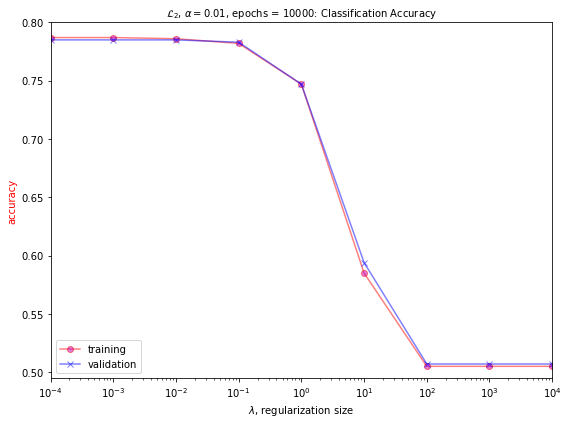

In [137]:
print('Regularization Plot...\t')

fig, ax3 = plt.subplots(figsize=(8, 6), tight_layout=True)
ax3.semilogx(train_acc_df.regularizers, train_acc_df.accuracy,
             color='r', marker='o', markerfacecolor='m', zorder=1.5, alpha=0.5)

ax3.semilogx(dev_acc_df.regularizers, dev_acc_df.accuracy,
             color='b', marker='x', markerfacecolor='r', zorder=1.5, alpha=0.5)

min_axis = min(train_acc_df.accuracy.min(), dev_acc_df.accuracy.min())
max_axis = max(train_acc_df.accuracy.max(), dev_acc_df.accuracy.max())

ax3.set_ylabel(f'accuracy', color='r')
ax3.set_xlabel(f'$\\lambda$, regularization size')
ax3.set_xlim([1e-4, 1e4])
ax3.set_ylim(0.495, 0.8)
ax3.set_title(f"$\\mathcal{{L}}_2$, $\\alpha = {0.01}$, epochs = {10000}: Classification Accuracy",
              color='k', weight='normal', size=10)
ax3.legend(["training", "validation"], loc="lower left")

plt.savefig("l2_train_dev_acc_cmp.jpg")
print('Done.\n')

####### The training class accuracy remain approximately constant for a while, then generally reduces as we increase lambda(10^-2, 10^4). This is the case because, increase in lambda, directly increase the loss function and hence approximation error. The validation class accuracy also remain approximately constant for a while, then generally reduces as we increase lambda within the given range. The best validation accuracy in this range  is lambda = 10^-2 with an accuracy of 78.54%. This is illustrated in the figure below.

#### Part 1(b): Report for each of the three lambda values, the resulting model's top 5 features with the largest weight magnitude 

In [202]:
for lambd in [1e-3, 1e-2, 1e-1]:
    weight_ = weight_dict[lambd]
    sortedweight = weight_.abs().sort_values(ascending=False)[:5]
    biggest_weights = weight_.loc[list(sortedweight.index.values)]
    print("Top 5 features and their corresponding weights for lambda={}".format(lambd)) 
    print(biggest_weights, "\n")

Top 5 features and their corresponding weights for lambda=0.001
Previously_Insured         -2.112892
Vehicle_Damage              1.836570
Policy_Sales_Channel_152   -0.687872
Vehicle_Age_1              -0.634887
Policy_Sales_Channel_160   -0.584882
dtype: float64 

Top 5 features and their corresponding weights for lambda=0.01
Previously_Insured         -1.583421
Vehicle_Damage              1.466526
Policy_Sales_Channel_152   -0.545381
dummy                      -0.545281
Vehicle_Age_1              -0.495377
dtype: float64 

Top 5 features and their corresponding weights for lambda=0.1
Vehicle_Damage              0.651357
Previously_Insured         -0.615228
dummy                      -0.427060
Policy_Sales_Channel_152   -0.250101
Vehicle_Age_1              -0.224794
dtype: float64 



####### The resulting top five features with respect to their weight magnitude are illustrated below with lambda values of
10^-3, 10^-2 and 10^-1. Interestingly, in this range, there is no much difference in the selected top 5 features. However,
as the value of lambda increases outside this range, the top features gradually begin to differ. This can be interpreted as automatic feature mapping during the regression process. The optimization process automatically associates the most important features with larger weights relative to the other features.

#### Part1(c): Compute the sparsity of the model and plot it as a function of lambda

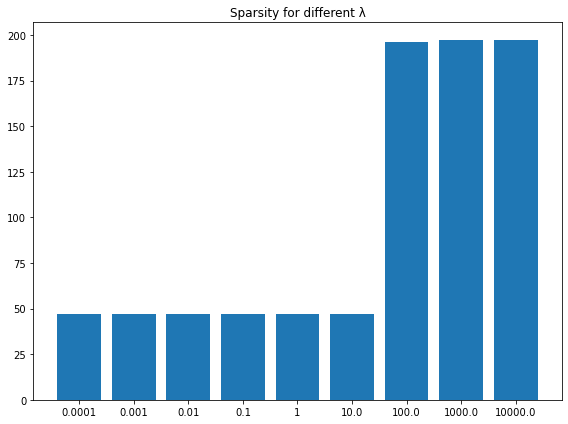

In [213]:
nz_weight_count = []
regs = []

for key in weight_dict.keys():
    nz_weight_count.append(np.count_nonzero(weight_dict[key]==0) or np.count_nonzero(np.isnan(weight_dict[key])))
    regs.append(str(key))

fig, ax = plt.subplots(figsize=(8, 6), tight_layout=True)
ax.bar(regs, nz_weight_count)
plt.title('Sparsity for different \u03BB')
plt.savefig('l2_sparsity.jpg')

####### It can be observed from the figure below, that as we increase lambda, the model sparsity increases. Increase in lambda numerically forces the weights to be very close to zero. When lambda reaches 1000, 10000, we observed the model sparsity becomes equal to the number of features.

#### Part 2 - Logistic regression with L2 regularization with noisy data

In [13]:
path3 = "IA2-train-noisy.csv"

noisy_data = load_data(path3)
train_noisy, dev = preprocess_data(noisy_data, dev)

weight_dict = defaultdict(list)
regularizers = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4]

train_X = train_noisy.iloc[:, :-1]
train_y = train_noisy.iloc[:, -1]
dev_X = dev.iloc[:, :-1]
dev_y = dev.iloc[:, -1]
train_acc_array = []
dev_acc_array = []
    
for regularizer in regularizers:
    weight, train_acc, dev_acc = logistic_regression(train_X, train_y, 0.01, regularizer, dev_X, dev_y)
    train_acc_array.append(round(train_acc, 3))
    dev_acc_array.append(round(dev_acc, 3))
    weight_dict[regularizer] = weight

train_acc_df = pd.DataFrame({'regularizers': regularizers, 'accuracy': train_acc_array})
dev_acc_df = pd.DataFrame({'regularizers': regularizers, 'accuracy': dev_acc_array})

iter=10000, loss=0.6587951299377414, regularizer=0.0001, train_acc=0.6111666666666666, dev_acc=0.7875
iter=10000, loss=0.6596454163854043, regularizer=0.001, train_acc=0.6111666666666666, dev_acc=0.7879
iter=10000, loss=0.665814638853911, regularizer=0.01, train_acc=0.6105, dev_acc=0.7865
iter=10000, loss=0.682715271237709, regularizer=0.1, train_acc=0.6091666666666666, dev_acc=0.7814
iter=10000, loss=0.6922634405827164, regularizer=1, train_acc=0.5948333333333333, dev_acc=0.7435
iter=10000, loss=0.6930113621226076, regularizer=10.0, train_acc=0.5041666666666667, dev_acc=0.5068
iter=10000, loss=0.6931124579357992, regularizer=100.0, train_acc=0.5041666666666667, dev_acc=0.5066
iter=10000, loss=nan, regularizer=1000.0, train_acc=0.5041666666666667, dev_acc=0.5066
iter=10000, loss=nan, regularizer=10000.0, train_acc=0.5041666666666667, dev_acc=0.5066


Regularization Plot...	
Done.



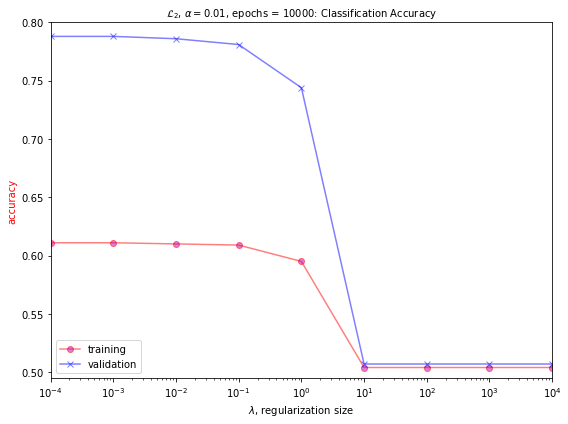

In [14]:
print('Regularization Plot...\t')

fig, ax3 = plt.subplots(figsize=(8, 6), tight_layout=True)
ax3.semilogx(train_acc_df.regularizers, train_acc_df.accuracy,
             color='r', marker='o', markerfacecolor='m', zorder=1.5, alpha=0.5)

ax3.semilogx(dev_acc_df.regularizers, dev_acc_df.accuracy,
             color='b', marker='x', markerfacecolor='r', zorder=1.5, alpha=0.5)

min_axis = min(train_acc_df.accuracy.min(), dev_acc_df.accuracy.min())
max_axis = max(train_acc_df.accuracy.max(), dev_acc_df.accuracy.max())

ax3.set_ylabel(f'accuracy', color='r')
ax3.set_xlabel(f'$\\lambda$, regularization size')
ax3.set_xlim([1e-4, 1e4])
ax3.set_ylim(0.495, 0.8)
ax3.set_title(f"$\\mathcal{{L}}_2$, $\\alpha = {0.01}$, epochs = {10000}: Classification Accuracy",
              color='k', weight='normal', size=10)
ax3.legend(["training", "validation"], loc="lower left")

plt.savefig("l2_noisy_train_dev_acc_cmp.jpg")
print('Done.\n')

####### Some of the observed differences between the former model and the one trained with noisy data are:
1. The training accuracy dropped significantly in the model trained with the noisy data compared to the former model. This is expected since about 30% of the labels for the training data have been flipped and thus reducing the accuracy of the predictions of the model. 
2. Unsurprisingly, the validation accuracy remains the same and is comparable to what was obtained under the former model. An obvious explanation for this behavior is due to the effect of the regularization parameter. The L2 regularizer ensures that our model that does not overfit on the noisy training data so that it can have good generalization performance when tested on new, unseen data.
3. Another notable difference is the decrease in the size of the feature weights learned in the model trained with the noisy data. There is a noticeable reduction in the size of the weights of the top-5 features in the model trained with the noisy data. This behavior can be attributed to the effect of the regularization parameter which acts proportionately to to the size of the learned weights. 

Regularization penalizes the feature weights coefficients of the noisy training instances to prevent our model from picking up the noise or pecularities or imagine a false pattern where there is none.

It does this so that it can keep our model robust and generally improve its generalization performance to unseen data.

#### Part 3 - Logistic regression with L1 (Lasso) regularization

In [19]:
def lasso_regression(X, y, lr, lambd, dev_X, dev_y):
    weight = np.zeros(X.shape[1])
    stopping_threshold = 1e-8
    
    for itr in range(10000):
        gradient = ((X.multiply(y - sigmoid_func(X.dot(weight)), axis=0)).mean())
        weight = weight + lr * gradient
        weight[1:] = np.sign(weight[1:]) * np.maximum(np.abs(weight[1:]) - (lr * lambd), np.zeros(weight[1:].shape))
        
        train_acc = cal_accuracy(sigmoid_func(X.dot(weight)), y)
        dev_acc = cal_accuracy(sigmoid_func(dev_X.dot(weight)), dev_y)
        
        loss = ((-1 * y * np.log(sigmoid_func(X.dot(weight)))) - ((np.ones(X.shape[0]) - y) * np.log(
            np.ones(X.shape[0]) - sigmoid_func(X.dot(weight))))).mean() + lambd * np.sum(np.abs(weight[1:]))
        
        # print("iter={}, loss={}, train_acc={}, dev_acc={}".format(itr + 1, loss, train_acc, dev_acc))
        
        if np.linalg.norm(gradient) <= stopping_threshold:
            break
            
    train_acc = cal_accuracy(sigmoid_func(X.dot(weight)), y)
    dev_acc = cal_accuracy(sigmoid_func(dev_X.dot(weight)), dev_y)
    loss = ((-1 * y * np.log(sigmoid_func(X.dot(weight)))) - ((np.ones(X.shape[0]) - y) * np.log(
    np.ones(X.shape[0]) - sigmoid_func(X.dot(weight))))).mean() + lambd * np.sum(np.power(weight[1:], 2))

    print("iter={}, loss={}, regularizer={}, train_acc={}, dev_acc={}".format(itr + 1, loss, lambd, train_acc, dev_acc))

    return weight, train_acc, dev_acc

#### Part 3(a): Plot the training accuracy and validation accuracy of the learned model as a function of i used for the regularizer

In [20]:
weight_dict = defaultdict(list)
regularizers = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4]

train, dev = preprocess_data(train, dev)

train_X = train.iloc[:, :-1]
train_y = train.iloc[:, -1]
dev_X = dev.iloc[:, :-1]
dev_y = dev.iloc[:, -1]
train_acc_array = []
dev_acc_array = []
    
for regularizer in regularizers:
    weight, train_acc, dev_acc = logistic_regression(train_X, train_y, 0.01, regularizer, dev_X, dev_y)
    train_acc_array.append(round(train_acc, 3))
    dev_acc_array.append(round(dev_acc, 3))
    weight_dict[regularizer] = weight

train_acc_df = pd.DataFrame({'regularizers': regularizers, 'accuracy': train_acc_array})
dev_acc_df = pd.DataFrame({'regularizers': regularizers, 'accuracy': dev_acc_array})

iter=10000, loss=0.436495700716022, regularizer=0.0001, train_acc=0.7871666666666667, dev_acc=0.7701
iter=10000, loss=0.4465084683299602, regularizer=0.001, train_acc=0.787, dev_acc=0.7697
iter=10000, loss=0.5080134094516261, regularizer=0.01, train_acc=0.786, dev_acc=0.7676
iter=10000, loss=0.6297343425561405, regularizer=0.1, train_acc=0.7815, dev_acc=0.7874
iter=10000, loss=0.6879717752272939, regularizer=1, train_acc=0.7468333333333333, dev_acc=0.5066
iter=10000, loss=0.6924807840898182, regularizer=10.0, train_acc=0.5853333333333334, dev_acc=0.5066
iter=10000, loss=0.6931036243719721, regularizer=100.0, train_acc=0.5046666666666667, dev_acc=0.5066
iter=10000, loss=nan, regularizer=1000.0, train_acc=0.5046666666666667, dev_acc=0.5066
iter=10000, loss=nan, regularizer=10000.0, train_acc=0.5046666666666667, dev_acc=0.5066


###### Plot the accuracy curves

Regularization Plot...	
Done.



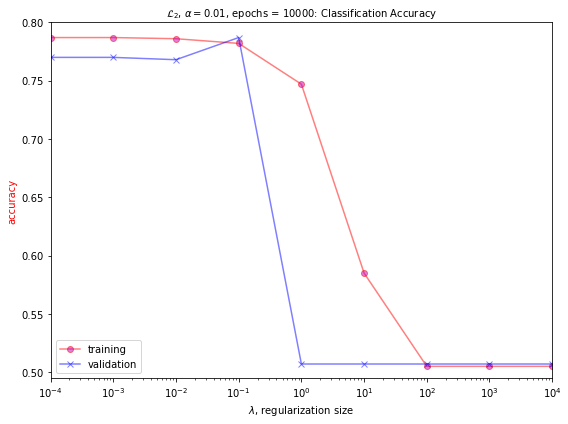

In [21]:
print('Regularization Plot...\t')

fig, ax3 = plt.subplots(figsize=(8, 6), tight_layout=True)
ax3.semilogx(train_acc_df.regularizers, train_acc_df.accuracy,
             color='r', marker='o', markerfacecolor='m', zorder=1.5, alpha=0.5)

ax3.semilogx(dev_acc_df.regularizers, dev_acc_df.accuracy,
             color='b', marker='x', markerfacecolor='r', zorder=1.5, alpha=0.5)

min_axis = min(train_acc_df.accuracy.min(), dev_acc_df.accuracy.min())
max_axis = max(train_acc_df.accuracy.max(), dev_acc_df.accuracy.max())

ax3.set_ylabel(f'accuracy', color='r')
ax3.set_xlabel(f'$\\lambda$, regularization size')
ax3.set_xlim([1e-4, 1e4])
ax3.set_ylim(0.495, 0.8)
ax3.set_title(f"$\\mathcal{{L}}_2$, $\\alpha = {0.01}$, epochs = {10000}: Classification Accuracy",
              color='k', weight='normal', size=10)
ax3.legend(["training", "validation"], loc="lower left")

plt.savefig("l1_train_dev_acc_cmp.jpg")
print('Done.\n')

#######  The training class accuracy remain approximately constant for a while, then generally reduces as we increase lambda(10^-2, 10^4). This is the case because, increase in lambda, directly increase the loss function and hence approximation error. The validation class accuracy also remain approximately constant for a while (for lambda from 10^-4 to 10^-1), then it sharply reduced and stayed approximately constant at this value for the rest of the regularization parameters in these range. The best validation accuracy in this range  is lambda = 10^-3 with an accuracy of 76.97%. This is illustrated in the figure below.

#### Part 3(b): Report for each of the three lambda values, the resulting model's top 5 features with the largest weight magnitude 

In [23]:
for lambd in [1e-4, 1e-3, 1e-2]:
    weight_ = weight_dict[lambd]
    sortedweight = weight_.abs().sort_values(ascending=False)[:5]
    biggest_weights = weight_.loc[list(sortedweight.index.values)]
    print("Top 5 features and their corresponding weights for lambda={}".format(lambd)) 
    print(biggest_weights, "\n")

Top 5 features and their corresponding weights for lambda=0.0001
Previously_Insured         -2.192550
Vehicle_Damage              1.890561
Policy_Sales_Channel_152   -0.708503
Vehicle_Age_1              -0.655143
Policy_Sales_Channel_160   -0.609874
dtype: float64 

Top 5 features and their corresponding weights for lambda=0.001
Previously_Insured         -2.112892
Vehicle_Damage              1.836570
Policy_Sales_Channel_152   -0.687872
Vehicle_Age_1              -0.634887
Policy_Sales_Channel_160   -0.584882
dtype: float64 

Top 5 features and their corresponding weights for lambda=0.01
Previously_Insured         -1.583421
Vehicle_Damage              1.466526
Policy_Sales_Channel_152   -0.545381
dummy                      -0.545281
Vehicle_Age_1              -0.495377
dtype: float64 



####### The resulting top five features with respect to their weight magnitude are illustrated below with lambda values of
10^-4, 10^-3 and 10^-2. Interestingly, in this range, there is no much difference in the selected top 5 features. However,
as the value of lambda increases outside this range, the top features gradually begin to differ. This can be interpreted 
as automatic feature mapping during the regression process. The optimization process automatically associates the most important features with larger weights relative to the other features.

#### Part3(c): Compute the sparsity of the model and plot it as a function of lambda

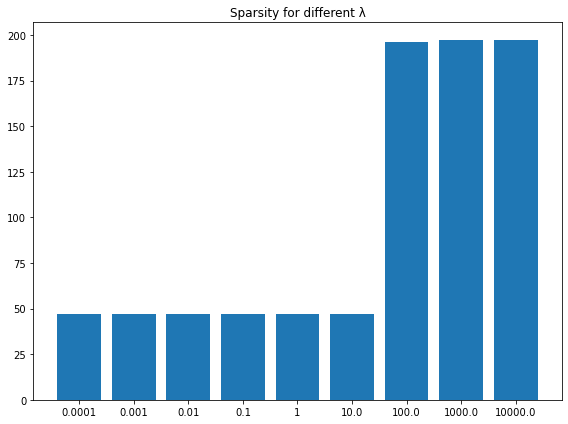

In [28]:
nz_weight_count = []
regs = []

for key in weight_dict.keys():
    nz_weight_count.append(np.count_nonzero(weight_dict[key]==0) or np.count_nonzero(np.isnan(weight_dict[key])))
    regs.append(str(key))

fig, ax = plt.subplots(figsize=(8, 6), tight_layout=True)
ax.bar(regs, nz_weight_count)
plt.title('Sparsity for different \u03BB')
plt.savefig('l1_sparsity.jpg')

######## As lambda increases, the weights becomes sparser; if lambda increases, sparsity is expected to increase even more. These trends are similar to what we have seen in 1(c). However, in L1 regularization, the sparsity increases rapidly from lambda >= 10^-4, which is faster than L2 regularization. But as lambda increases towards infinity, both penalties for weights become too heavy and all feature weights will become 0.